<a href="https://colab.research.google.com/github/kelvin19-dev/ML/blob/main/Predictions_Using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio 
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("TSLA.csv")


In [ ]:
#read_csv function from pandas

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19802300
1,2021-02-17,779.090027,799.840027,762.010010,798.150024,798.150024,25996500
2,2021-02-18,780.900024,794.690002,776.270020,787.380005,787.380005,17957100
3,2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18958300
4,2021-02-22,762.640015,768.500000,710.200012,714.500000,714.500000,37269700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,797.603730,814.620910,778.402819,796.736070,796.736070,2.704625e+07
std,175.757371,181.657190,168.773849,175.282015,175.282015,1.140822e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,669.937500,683.922501,651.927506,668.027497,668.027497,1.894995e+07
50%,724.930023,740.679993,712.069976,730.539978,730.539978,2.478520e+07
75%,929.474991,946.645020,903.657516,931.437500,931.437500,3.224438e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x = 'Date', y = 'Close')

In [ ]:
px.line(df, x = 'Date', y = 'Close')

In [ ]:
px.area(df, x = 'Date', y = 'Volume')

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')

# Understanding Facebook Prophet

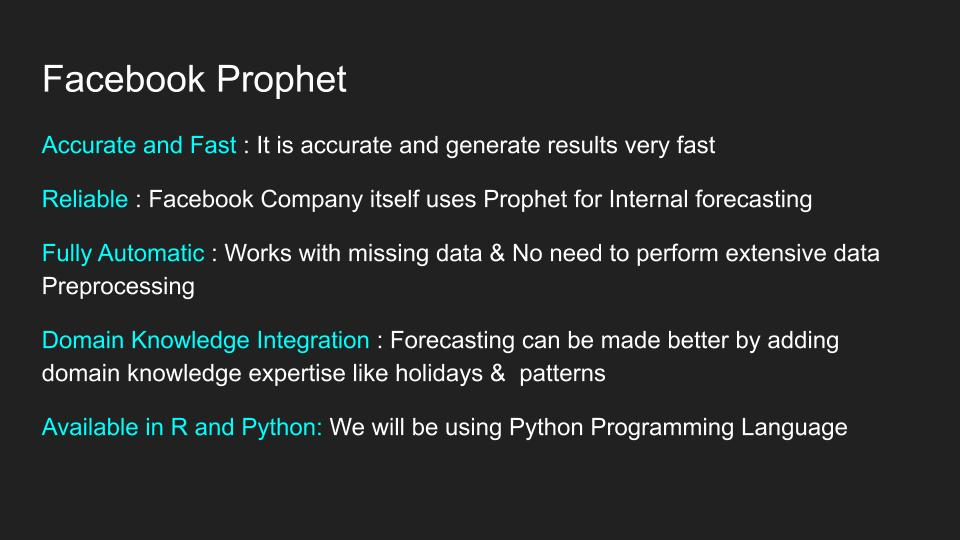

## Data Preperation

In [ ]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf.head()

,Date,Close
0,2021-02-16,796.219971
1,2021-02-17,798.150024
2,2021-02-18,787.380005
3,2021-02-19,781.299988
4,2021-02-22,714.500000


In [ ]:
prophet_df = ndf.rename(columns={'Date':"ds", 'Close':'y'})

In [ ]:
prophet_df.head()

,ds,y
0,2021-02-16,796.219971
1,2021-02-17,798.150024
2,2021-02-18,787.380005
3,2021-02-19,781.299988
4,2021-02-22,714.500000


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-16,719.352536,631.981620,779.820108,719.352536,719.352536,-13.130217,-13.130217,-13.130217,-13.130217,-13.130217,-13.130217,0.0,0.0,0.0,706.222319
1,2021-02-17,718.671943,632.526737,782.162188,718.671943,718.671943,-10.782467,-10.782467,-10.782467,-10.782467,-10.782467,-10.782467,0.0,0.0,0.0,707.889477
2,2021-02-18,717.991350,619.813366,774.023401,717.991350,717.991350,-18.764503,-18.764503,-18.764503,-18.764503,-18.764503,-18.764503,0.0,0.0,0.0,699.226847
3,2021-02-19,717.310757,613.428284,771.711524,717.310757,717.310757,-20.473519,-20.473519,-20.473519,-20.473519,-20.473519,-20.473519,0.0,0.0,0.0,696.837238
4,2021-02-22,715.268978,626.462247,780.322469,715.268978,715.268978,-11.842332,-11.842332,-11.842332,-11.842332,-11.842332,-11.842332,0.0,0.0,0.0,703.426646


In [ ]:
px.line(forecast, x='ds', y='yhat')

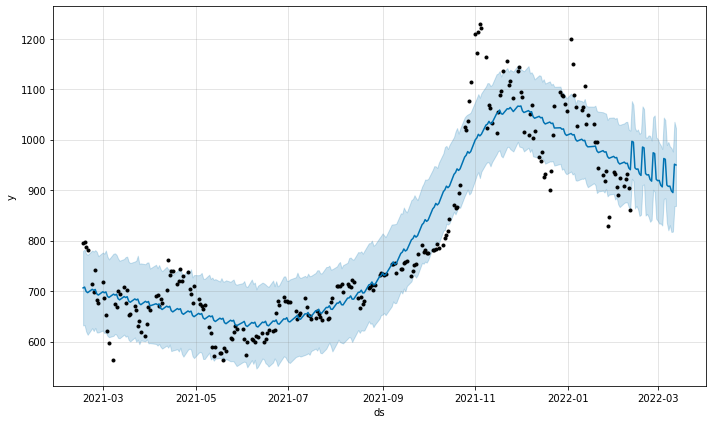

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

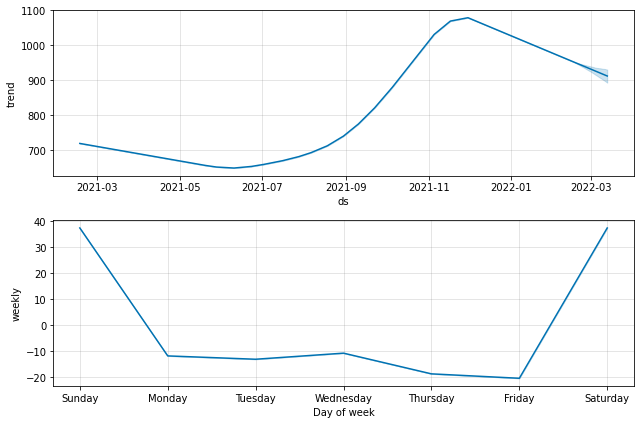

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>